# Лабораторная работа №1

## Группа: М8О-206Б-19
## Студент: Пивницкий Д.С.
## Вариант: 19

## <span style="color:gray">Часть 1 - Квадратик</span>

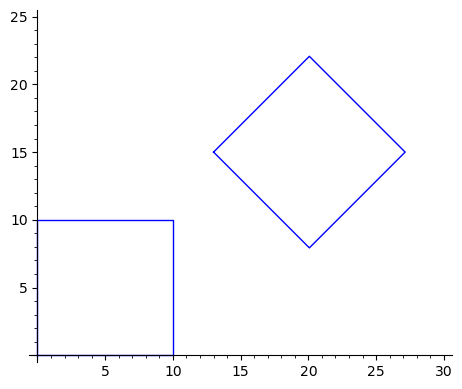

In [147]:
a = 10
b = 13
c = 15
rectangle_src = matrix([[0, 0], [0, a], [a, a], [a, 0], [0, 0]])
alpha = math.radians(45)
mat_rot = matrix([[cos(alpha), -sin(alpha)], [sin(alpha), cos(alpha)]])
mat_move = matrix([[b, c], [b, c], [b, c], [b, c], [b, c]])
rectangle_moved = rectangle_src * mat_rot + mat_move
show(line(rectangle_src) + line(rectangle_moved), xmin = 0, xmax = 30, ymin = 0, ymax = 25, aspect_ratio = 1)

## <span style="color:gray">Часть 2 - Исследование функции</span>

In [148]:
y = (x**3-x**2-x+1)**(1/3) / tan(x)

Для заданной формулой функции найти:
<pre>
1. Область определения функции.
2. Является ли функция четной или нечетной, является ли периодической.
3. Точки пересечения графика с осями координат.
4. Промежутки знакопостоянства.
5. Промежутки возрастания и убывания.
6. Точки экстремума и значения в этих точках.
7. Непрерывность. Наличие точек разрыва и их классификация.
8. Асимптоты.
</pre>

Номер варианта: **4**

In [149]:
show(y)

(x^3 - x^2 - x + 1)^(1/3)/tan(x)

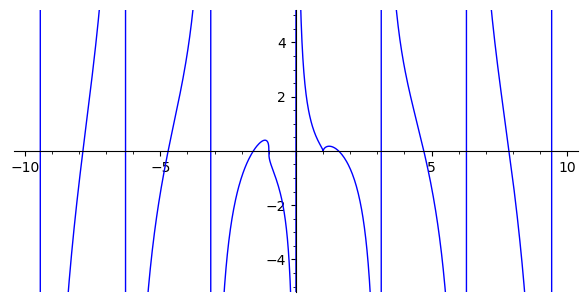

In [150]:
# От -inf до -1
f1(x) = -(-(x^3 - x^2 - x + 1))^(1/3) / tan(x)
# От -1 до +inf
f2(x) = (x^3 - x^2 - x + 1)^(1/3) / tan(x)
# Переменная, хранящую функцию целиком
f(x) = (x^3 - x^2 - x + 1)^(1/3) / tan(x)

plot_left = plot(f1, (x, -10, -1), ymin = -5, ymax = 5)
plot_right =  plot(f2, (x, -1, 10), ymin = -5, ymax = 5)
show(plot_left + plot_right, ymin = -5, ymax = 5, aspect_ratio=1)

Исследуем функцию на промежутке **[-pi/2, pi/2]**
***

**1. Область определения** 

Так как $tan(x)$ не должен быть равен нулю

D: $x \neq \pi k, \forall k \in Z$
***

**2. Чётность функции**

Если функция является четной, то $f(x) = f(-x)$. Тогда $f(x) - f(-x) = 0$

In [151]:
y_even = (f(x) - f(-x)).expand().simplify()
show(y_even)

(x^3 - x^2 - x + 1)^(1/3)/tan(x) + (-x^3 - x^2 + x + 1)^(1/3)/tan(x)

Так как выражение $y(x) - y(-x)$ не равно нулю, то $y(x)$ **не четна**.
***
Если функция является нечетной, то $f(-x) = -f(x)$. Тогда $f(-x) + f(x) = 0$

In [152]:
y_odd = (f(-x) + f(x)).expand().simplify()
show(y_odd)

(x^3 - x^2 - x + 1)^(1/3)/tan(x) - (-x^3 - x^2 + x + 1)^(1/3)/tan(x)

Так как выражение $y(-x) + y(x)$ не равно нулю, то $y(x)$ **не нечетна**.

Исходя из вышеописанного, можем сказать что **функция общего вида**.
***

**3. Точки пересечения**

Давайте рассмотрим следующие уравнения:
* $f(x) = 0$ - пересечение графика функции с осью абсцисс
* $f(0) = x$ - пересечение графика функции с осью ординат

В точке 0, функция $f$ не определена, следовательно у графика функции **нет пересечений с осью ординат**.

Что бы найти пересечения графика функции с осью абсцисс, нужно решить уравнение $f(x) = 0$:
***

In [153]:
solutions = solve(f==0, x)
print("Функция y(x) пересекается с осью абсцисс в точках: " + " ; ".join(map(str, solutions)))

Функция y(x) пересекается с осью абсцисс в точках: x == -1 ; x == 1


На самом деле это не совсем правильный ответ, так как в метод solve не указал бексонечное кол-во корней, которые дает знаменатель $tan(x)$.
Давайте попробуем упростить функцию, а затем снова найти корни:

In [154]:
f_sf(x) = f(x).simplify_full()
solutions = solve(f_sf==0, x)
print("Функция y(x) пересекается с осью абсцисс в точках: " + " ; ".join(map(str, solutions)))

Функция y(x) пересекается с осью абсцисс в точках: x == 1/2*pi ; x == -1 ; x == 1


Это уже больше похоже на правду. Делаем вывод, что график функции **имеет пересечения с осью абсцисс** в точках: $x = -1; x = 1; x = \frac{\pi}{2} + \pi k$
***

**4. Промежутки знакопостоянства**

Функция меняет знак в точках $f(x) = 0$, кроме того, она меняет знак в точках разрыва.

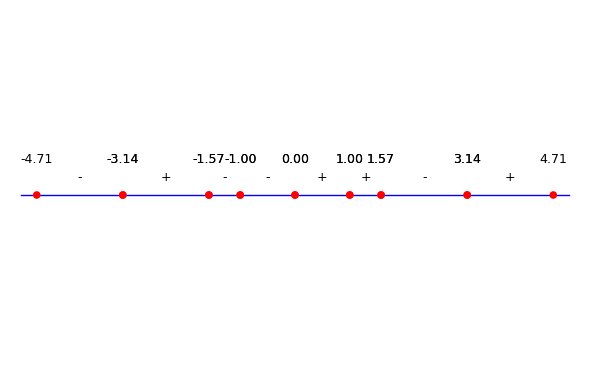

In [155]:
# отрисовка отрезка - основная линия для графика промежутков знакопостоянства
intervals_of_constancy = plot(0, xmin=-5, xmax=5, ymin=-0.5, ymax=0.5)

def add_point(x):
    graphic = point((x, 0), color="red", size=30, zorder=10)
    graphic += text("{:0.2f}".format(x.n()), (x, 0.1), color="black", fontsize=9)
    return graphic

def add_interval(x1, x2):
    graphic = add_point(x1)
    graphic += add_point(x2)
    graphic += text("+" if (f((x1 + x2) / 2).n() > 0) else "-", (((x1 + x2)/2).n(), 0.05), color="black", fontsize=9)
    return graphic

# Положительная область
intervals_of_constancy  += add_interval(0, 1)
intervals_of_constancy  += add_interval(1, pi/2)
intervals_of_constancy  += add_interval(pi/2, pi)
intervals_of_constancy  += add_interval(pi, 3*pi/2)

# Отрицательная область
intervals_of_constancy  += add_interval(0, -1)
intervals_of_constancy  += add_interval(-1, -pi/2)
intervals_of_constancy  += add_interval(-pi/2, -pi)
intervals_of_constancy  += add_interval(-pi, -3*pi/2)

# оси не нужны - скрываем
intervals_of_constancy.show(axes=False)

Данная функция имеет бесконечное число промежутков знакопостоянства: например на промежутке $[\frac{\pi}{2}; +\infty]$ функция функция принимает положительные значения на промежутках $[\frac{\pi}{2} + \pi k; \pi + \pi k], k \in N$.
***

**5. Промежутки возрастания и убывания**

Задача нахождения промежутков возрастания и убывания очень похожа на задачу нахождения промежутков знакопстоянства:
1. Нужно найти производную.
2. Если значение производной положительное - функция возрастает, иначе - убывает

In [156]:
# Находим производную
df1 = f1.derivative().expand().simplify_full()
df2 = f2.derivative().expand().simplify_full()
df = f.derivative().expand().simplify_full()
show(df)

x |--> -1/3*(3*x^3 - (3*x^2 - 2*x - 1)*cos(x)*sin(x) - 3*x^2 - 3*x + 3)/((x^3 - x^2 - x + 1)^(2/3)*sin(x)^2)

In [157]:
# Находим экстремумы
solutions = solve(df==0, x)
solutions_num = [find_root(sol, -5, 5) for sol in solutions]
for sol in solutions:
    show(sol)
    print(f"x = {find_root(sol, -5, 5)}")

x == 1

x = 1.0


x == 1/2*cos(x)*sin(x) - 1/6*sqrt(9*cos(x)^2*sin(x)^2 + 12*cos(x)*sin(x) + 36)

x = -1.142665336153391


x == 1/2*cos(x)*sin(x) + 1/6*sqrt(9*cos(x)^2*sin(x)^2 + 12*cos(x)*sin(x) + 36)

x = 1.223888327747434


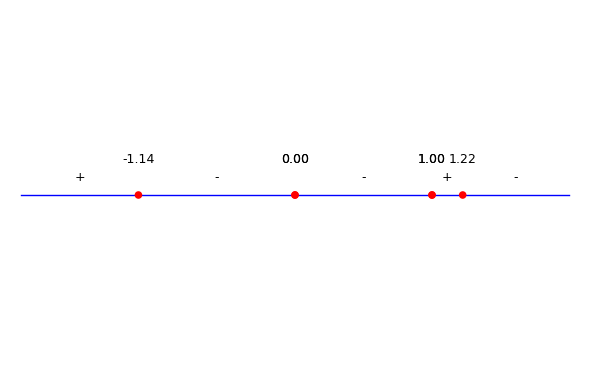

In [158]:
# Изображаем ответ
def add_point(x):
    graphic = point((x, 0), color="red", size=30, zorder=10)
    graphic += text("{:0.2f}".format(x), (x, 0.1), color="black", fontsize=9)
    return graphic

def add_interval(x1, x2):
    graphic = add_point(x1)
    graphic += add_point(x2)
    graphic += text("+" if (df((x1 + x2) / 2).n() > 0) else "-", (((x1 + x2)/2), 0.05), color="black", fontsize=9)
    return graphic

# Границы промежутков
roots_df = [-1.142665336153391, 0, 1, 1.223888327747434]
intervals_of_monotonics = plot(0, xmin=-2, xmax=2, ymin=-0.5, ymax=0.5)
for i in range(0, len(roots_df)-1):
    intervals_of_monotonics += add_interval(roots_df[i], roots_df[i+1])
    
# Границы
intervals_of_monotonics += text("+", ((-2 + roots_df[0])/2, 0.05), color="black", fontsize=9)
intervals_of_monotonics += text("-", ((2 + roots_df[-1])/2, 0.05), color="black", fontsize=9)
    
intervals_of_monotonics.show(axes=False)

**6. Точки экстремума и значения в этих точках**

Мы уже нашли корни первой производной. Теперь нужно проверить, меняет ли знак производная при переходе через корень.
Таким образом мы имеем два локальных **максимума**: $-1.14, 1.22$; А так же оидн **локальный минимум**: $1.00$
***

**7. Непрерывность. Наличие точек разрыва и их классификация**

In [159]:
print("Левосторонний предел: " +  str(lim(f(x), x=0, dir="left")))
print("Правосторонний предел: " +  str(lim(f(x), x=0, dir="right")))

Левосторонний предел: -Infinity
Правосторонний предел: +Infinity


Все односторонние пределы бесконечны, значит функция непрырывна на всей числовой прямой кроме точек x = inf и x = -inf, в которых она терпит **разрывы второго рода.**
***

**8. Асимптоты**

Мы уже показали, что мы имеем бесконечное множество разрывов второго рода, следовательно мы имеем **бесконечное множество вертикальных асимптот**, совпадающих с множеством разрывов.

Проверим наличие наклонных асимптот:

In [160]:
print(lim(f(x) / x, x = +Infinity))
print(lim(f(x) / x, x = -Infinity))

und
und


Так как данных пределов не существует, то и **наклонных асимптот нет**.